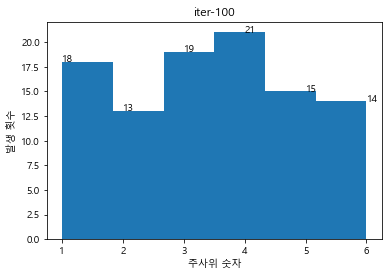

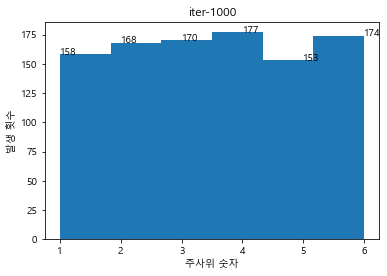

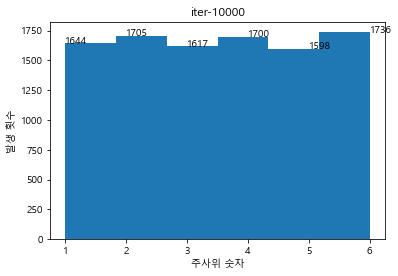

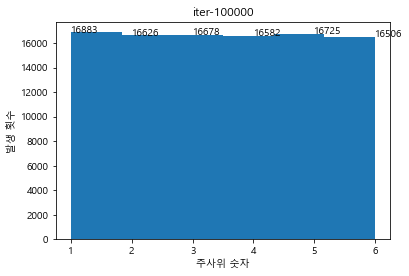

[주사위 시뮬레이션 분석 결과]
100번 시행한 결과, 각 숫자가 나타난 횟수 사이에 차이가 그래프 상으로 커 보입니다.
각 주사위 숫자의 발생확률을 보면(1부터 6까지 순서대로)
   100 0.18 0.13 0.19 0.21 0.15 0.14 
  1000 0.16 0.17 0.17 0.18 0.15 0.17 
 10000 0.16 0.17 0.16 0.17 0.16 0.17 
100000 0.17 0.17 0.17 0.17 0.17 0.17 
시행 횟수가 커지면서 각 숫자가 나타나는 확률이 1/6(=0.166666)에 가까워짐을 볼 수 있습니다.
또한 그래프 상에서도 모든 주사위의 숫자가 발생한 횟수도 비슷하게 나타남을 알 수 있습니다.


In [45]:
import random
import csv
import matplotlib.pyplot as plt

if __name__ == '__main__':
    f = open('q2_data.csv','a',newline='')
    wr = csv.writer(f)

    iter = 100
    for i in range(4):
        res = []
        for j in range(iter):
            n = random.randrange(1,7)
            res.append(n)
        wr.writerow(res)
        iter *= 10

    f.close()

    f = open('q2_data.csv','r')
    data = csv.reader(f,delimiter=',')
    hist = {}
    plt.rc('font', family='Malgun Gothic')
    iter = 100
    for row in data:
        for i in range(iter):
            row[i] = int(row[i])
        plt.title("iter-{0:d}".format(iter))
        plt.ylabel("발생 횟수")
        plt.xlabel("주사위 숫자")
        plt.hist(row, bins=6)
        hist[iter] = []
        for i in range(1,7):
            hist[iter].append(row.count(i))
            plt.text(i,row.count(i),"{0:d}".format(row.count(i)))
        plt.show()
        iter *= 10
        if iter > 100000: break

    f.close()
        
    print("[주사위 시뮬레이션 분석 결과]")
    print("100번 시행한 결과, 각 숫자가 나타난 횟수 사이에 차이가 그래프 상으로 커 보입니다.")
    print("각 주사위 숫자의 발생확률을 보면(1부터 6까지 순서대로)")
    for i in range(0,4):
        iter = 100*10**i#100,1000,10000,100000
        nh = hist[iter]
        print("{0:6d} ".format(iter),end="")
        for j in range(6):
            prob = nh[j] / iter
            print("{0:.2f} ".format(prob),end="")
        print()
    print("시행 횟수가 커지면서 각 숫자가 나타나는 확률이 1/6(=0.166666)에 가까워짐을 볼 수 있습니다.")
    print("또한 그래프 상에서도 모든 주사위의 숫자가 발생한 횟수도 비슷하게 나타남을 알 수 있습니다.")